In [1]:
import torch
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
                                          
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [7]:
from torch import nn, optim
import torch.nn.functional as F

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [11]:
model = Network()
images, label = next(iter(testloader))
ps =torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [12]:
top_p, top_class =  ps.topk(1, dim=1)
print(top_class[:10,:])

tensor([[3],
        [3],
        [3],
        [3],
        [3],
        [4],
        [3],
        [3],
        [3],
        [3]])


In [13]:
equals = top_class == label.view(*top_class.shape)

In [15]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f"Accuracy : {accuracy.item()*100}%")

Accuracy : 15.625%


In [18]:
model = Network()
criteron = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

epoch = 30
step = 0
train_losses, test_losses =[],[]
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        logps = model(images)
        loss =criteron(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
    else:
        test_loss =0
        accuracy = 0
        for images, labels in testloader:
            log_ps = model(images)
            test_loss += criteron(log_ps, labels)
            ps =torch.exp(log_ps)
            top_ps , top_class = ps.topk(1,dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy = torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: -0.668..  Test Loss: 21.699..  Test Accuracy: 0.005
Epoch: 2/30..  Training Loss: -0.668..  Test Loss: 54.516..  Test Accuracy: 0.004
Epoch: 3/30..  Training Loss: -0.665..  Test Loss: 267.762..  Test Accuracy: 0.004
Epoch: 4/30..  Training Loss: -0.655..  Test Loss: 472.942..  Test Accuracy: 0.003
Epoch: 5/30..  Training Loss: -0.557..  Test Loss: 758.122..  Test Accuracy: 0.003
Epoch: 6/30..  Training Loss: -0.565..  Test Loss: 1140.983..  Test Accuracy: 0.004
Epoch: 7/30..  Training Loss: -0.563..  Test Loss: 1190.751..  Test Accuracy: 0.004
Epoch: 8/30..  Training Loss: -0.520..  Test Loss: 1465.265..  Test Accuracy: 0.003
Epoch: 9/30..  Training Loss: -0.581..  Test Loss: 1492.250..  Test Accuracy: 0.004
Epoch: 10/30..  Training Loss: -0.565..  Test Loss: 2727.896..  Test Accuracy: 0.002
Epoch: 11/30..  Training Loss: -0.567..  Test Loss: 1972.713..  Test Accuracy: 0.005
Epoch: 12/30..  Training Loss: -0.582..  Test Loss: 2134.784..  Test Accuracy: 0.

In [21]:
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.512..  Test Loss: 0.488..  Test Accuracy: 0.823
Epoch: 2/30..  Training Loss: 0.396..  Test Loss: 0.459..  Test Accuracy: 0.835
Epoch: 3/30..  Training Loss: 0.360..  Test Loss: 0.386..  Test Accuracy: 0.862
Epoch: 4/30..  Training Loss: 0.334..  Test Loss: 0.388..  Test Accuracy: 0.867
Epoch: 5/30..  Training Loss: 0.317..  Test Loss: 0.385..  Test Accuracy: 0.863
Epoch: 6/30..  Training Loss: 0.308..  Test Loss: 0.356..  Test Accuracy: 0.874
Epoch: 7/30..  Training Loss: 0.295..  Test Loss: 0.374..  Test Accuracy: 0.868
Epoch: 8/30..  Training Loss: 0.284..  Test Loss: 0.368..  Test Accuracy: 0.875
Epoch: 9/30..  Training Loss: 0.276..  Test Loss: 0.372..  Test Accuracy: 0.877
Epoch: 10/30..  Training Loss: 0.268..  Test Loss: 0.356..  Test Accuracy: 0.876
Epoch: 11/30..  Training Loss: 0.262..  Test Loss: 0.379..  Test Accuracy: 0.872
Epoch: 12/30..  Training Loss: 0.252..  Test Loss: 0.356..  Test Accuracy: 0.880
Epoch: 13/30..  Training Loss: 0.249.

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

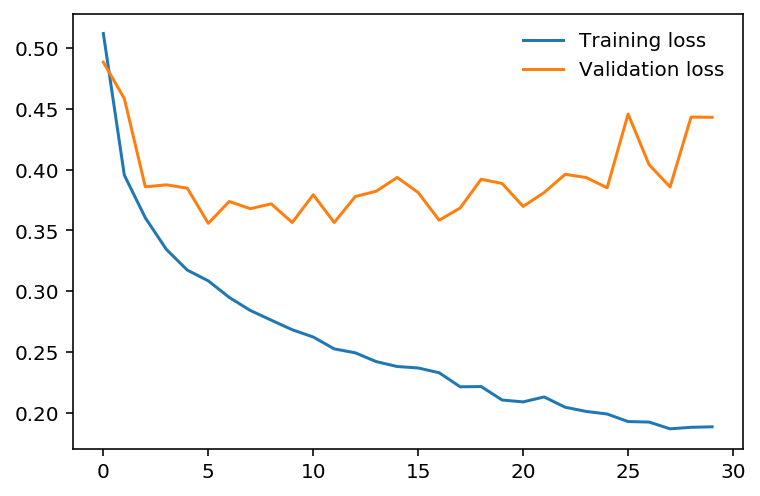

In [23]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [27]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p =0.2)
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [29]:
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.609..  Test Loss: 0.475..  Test Accuracy: 0.826
Epoch: 2/30..  Training Loss: 0.480..  Test Loss: 0.458..  Test Accuracy: 0.839
Epoch: 3/30..  Training Loss: 0.445..  Test Loss: 0.419..  Test Accuracy: 0.850
Epoch: 4/30..  Training Loss: 0.429..  Test Loss: 0.410..  Test Accuracy: 0.851
Epoch: 5/30..  Training Loss: 0.411..  Test Loss: 0.405..  Test Accuracy: 0.858
Epoch: 6/30..  Training Loss: 0.407..  Test Loss: 0.427..  Test Accuracy: 0.847
Epoch: 7/30..  Training Loss: 0.394..  Test Loss: 0.399..  Test Accuracy: 0.858
Epoch: 8/30..  Training Loss: 0.401..  Test Loss: 0.400..  Test Accuracy: 0.858
Epoch: 9/30..  Training Loss: 0.388..  Test Loss: 0.396..  Test Accuracy: 0.861
Epoch: 10/30..  Training Loss: 0.388..  Test Loss: 0.392..  Test Accuracy: 0.863
Epoch: 11/30..  Training Loss: 0.374..  Test Loss: 0.380..  Test Accuracy: 0.868
Epoch: 12/30..  Training Loss: 0.377..  Test Loss: 0.385..  Test Accuracy: 0.869
Epoch: 13/30..  Training Loss: 0.376.

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

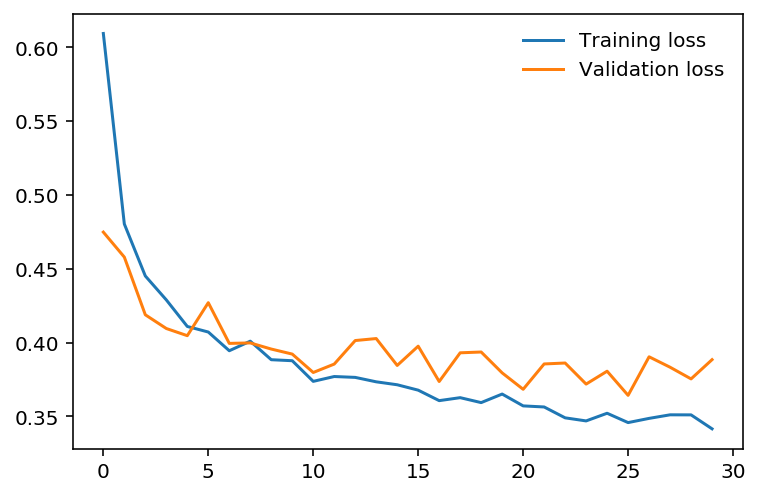

In [31]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)